<a href="https://colab.research.google.com/github/henriquebap/Machine_Learning_HB/blob/main/Checkpoint_2_Classificadores_de_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

----------------------
## Checkpoint - Diagnóstico Industrial: Classificador para Falha do Compressor.


## Integrantes do Grupo
---
- ###### Rm 97796 Henrique Baptista
- ###### Rm 97936 Gabriel Amâncio
- ###### Rm 98043 Pedro Pacheco

----------------------
Esse dataset contém dados dos sensores acústicos para coletar o funcionamento do compressor, sendo eles: Saudáveis, Problema no Rolamento e Problema na Volante. As coletas de dados podem ser exemplificadas na Fig.1.

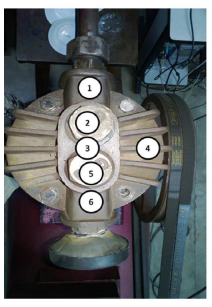

Fig.1 - Posicionamentos dos sensores para coleta de dados.
Fonte:(https://www.iitk.ac.in/idea/datasets/)

Será disponibilizado as 224 coletas de cada diagnóstico, em uma pasta separada. Porém a equipe pode utilizar, os arquivos .csv disponibilizados também.

# (4 pontos) 1- Leitura, Pré-processamento dos dados, Organização das entradas e saídas.





In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
#Carregar os arquivos .dat
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

imputer = SimpleImputer(fill_value = np.nan, strategy = 'mean')

valor_de_leitura = 5

saudavel = []
volante = []
rolamento = []
for i in range(valor_de_leitura):
  n = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/dataset_checkpoint/saudável/preprocess_Reading{i+1}.dat', sep =',', header = None)
  n_array = np.asarray(n)
  n_array_transposed = n_array.T
  saudavel_fit = imputer.fit_transform(n_array_transposed).reshape([-1])
  saudavel.append(saudavel_fit)
  v = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/dataset_checkpoint/volante/preprocess_Reading{i+1}.dat', sep =',', header = None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
#Carregar o arquivo .csv
X = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset_checkpoint/X.csv')
X = X.drop(columns= X.columns[0])
X = X.drop(X.index[0])

In [ ]:
X[:220]

In [18]:
import numpy as np
X = np.asarray(X)
funcionamento_saudavel = X[:,:49999]
problema_rolamento = X[:,50000:99999]
problema_volante = X[:,100000:149999]

In [15]:
print(f'Saudavel{funcionamento_saudavel.shape}')
print(f'Shape{problema_rolamento.shape}')
print(f'Volante{problema_volante.shape}')

Saudavel(223, 49999)
Shape(223, 49999)
Volante(223, 49999)


In [ ]:
#Criar o DataFrame
df_saudavel = pd.DataFrame(funcionamento_saudavel)
df_saudavel

In [ ]:
df_saudavel.head()

In [ ]:
df_rolamento = pd.DataFrame(problema_rolamento)
df_rolamento

In [ ]:
df_rolamento.head()


In [ ]:
df_volante = pd.DataFrame(problema_volante)
df_volante


In [ ]:
#Tsfel
# !pip install tsfel --quiet

In [ ]:
# import tsfel
# cfg = tsfel.get_features_by_domain('temporal')

# x_saudavel = tsfel.time_series_features_extractor(cfg, funcionamento_saudavel, fs = 50000, windows_size = funcionamento_saudavel, verbose=1, n_job = -1)

In [ ]:
# # import tsfel
# # cfg = tsfel.get_features_by_domain()

# x_saudavel = tsfel.time_series_features_extractor(cfg, df_saudavel, fs = 50000, verbose=1)

In [ ]:
#Criar as Saídas para cada DataFrame
y_saudavel = pd.DataFrame(['Saudavel' for col in range(len(df_saudavel))])
y_rolamento = pd.DataFrame(['Rolamento' for col in range(len(df_rolamento))])
y_volante = pd.DataFrame(['Volante' for col in range(len(df_volante))])

y = pd.concat([y_saudavel, y_rolamento])
y = pd.concat([y, y_volante])
y = y.assign(Class = y)
y = y.drop(columns=y.columns[0])
y


In [ ]:
funcionamento_saudavel

In [ ]:
problema_rolamento

In [ ]:
problema_volante

### Concatenando os DataFrames no eixo X

---

In [ ]:
X = pd.concat([df_saudavel, df_rolamento, df_volante])
X

# (4 pontos) 2 - Modelo(s) selecionado para a classificação e Treinamento do Modelo

In [81]:
from sklearn.model_selection import train_test_split
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [82]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 8)

In [83]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

st = StandardScaler() #Padronizar os dados
mm = MinMaxScaler() #Normalizar os dados

x_train_scaled = st.fit_transform(x_train)
x_test_scaled = st.fit_transform(x_test)

x_train_scaled

array([[ 0.96981436,  1.00435289,  1.18889294, ...,  0.70275072,
         0.77042322,  0.81313101],
       [-0.78434272, -1.04175218, -1.27664585, ..., -1.14309422,
        -0.99980224, -0.90902168],
       [-0.44725379, -0.23029363, -0.07048593, ...,  1.56081509,
         1.62993446,  1.6360964 ],
       ...,
       [-1.31984934, -1.44139208, -1.51821338, ..., -0.06019398,
         0.52519587,  0.81525657],
       [ 2.94783967,  3.0141984 ,  2.97252402, ..., -1.08856649,
        -0.86324829, -0.71168003],
       [ 0.04199276,  0.02401148,  0.00732027, ...,  0.74918065,
         0.92407016,  1.02169712]])

### Treinamento do modelo usnado Gaussian Naive Bayes (GaussianNB).
---


In [84]:
# # Naive Bayes Gaussiano
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_pred = gnb.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# (1 Ponto) 3 - Verificação do Modelo treinado e Análise das Métricas (Matriz de Confusão, Precisão, Recall, Acurácia e F1 Score)

In [85]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

## Figura de com matriz de confusao
---

<Figure size 1500x500 with 0 Axes>

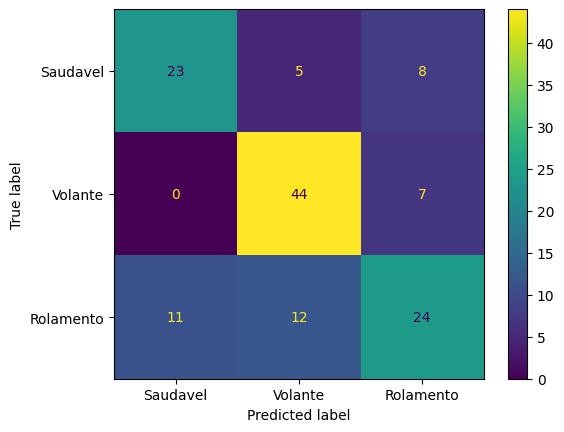

In [86]:
matriz_confusao = confusion_matrix(y_true=y_test, y_pred=y_pred)


# Define os rótulos das classes
class_labels = ["Saudavel", "Volante", "Rolamento"]


#plotagem de uma figura com a matriz de confusao
figure = plt.figure(figsize=(15,5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=class_labels)
disp.plot(values_format='d')
plt.show()

### Calculando Precisao, Recall, F1-score e support do modelo
---

In [87]:
from sklearn.metrics import classification_report, accuracy_score

print("Acurácia:", accuracy_score(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

Acurácia: 0.6791044776119403


              precision    recall  f1-score   support

   Rolamento       0.68      0.64      0.66        36
    Saudavel       0.72      0.86      0.79        51
     Volante       0.62      0.51      0.56        47

    accuracy                           0.68       134
   macro avg       0.67      0.67      0.67       134
weighted avg       0.67      0.68      0.67       134



# (1 Ponto) 4 - Verificação da Qualidade dos dados, Calcule a métrica de Kappa Cohen e a Curva de ROC

### Imports necessarios para calcular a metrica de Kappa
---

In [39]:
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt
from sklearn import metrics


In [88]:
cohen_kappa_score(y_test, y_pred)

0.5111978282999661

## Tentativa de construir uma ROC Curve
---


In [68]:
# from sklearn import metrics
# def plot_roc_curve(y_test, y_pred):
#   fpr, tpr, thresholds = metrics.roc_curve(y_test['Class'], y_pred)
#   roc_auc = metrics.auc(fpr,tpr)
#   # plt.plot([:,:49999], [:,:49999])
#   plt.plot(fpr,tpr, 'b', label='AUC = %0.2f' % roc_auc)
#   plt.legend(loc='Lower Right')
#   plt.plot([0, 1], [0, 1],'r--')
#   plt.xlim([-0.01, 1.01])
#   plt.ylim([-0.01, 1.01])
#   plt.xlabel("False Positive Rate")
#   plt.ylabel("True Positive Rate")
#   plt.title("Curva ROC")
#   plt.show()

In [ ]:
# plot_roc_curve(y_test, y_pred)


In [ ]:
# from sklearn.metrics import roc_curve
# import matplotlib.pyplot as plt

# fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plt.plot([0,1], [0,1], '--')
# plt.plot(fpr, tpr)
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title('Logistic Regression ROC Curve')
# plt.show()

In [ ]:
# from sklearn.metrics import roc_curve, auc

# svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred)
# auc_svm = auc(svm_fpr, svm_tpr)

# plt.figure(figsize=(5, 5), dpi=100)
# plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)

# plt.xlabel('False Positive Rate -->')
# plt.ylabel('True Positive Rate -->')

# plt.legend()

# plt.show()